In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import pandas as pd

In [13]:
model_files = ["SVM.pickle", "LogReg.pickle", "knn.pickle", "rfc.pickle"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

In [4]:
def load_model(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [5]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

In [9]:
df = pd.read_csv('IRIS.csv')
x_test = df.values[:, 0:4]
y_test = df.values[:, 4]

In [11]:
results = {}
for model_file in model_files:
    model = load_model(model_file)
    results[model_file] = evaluate_model(model, x_test, y_test)

In [31]:
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value*100:.2f}%")


Model: SVM.pickle
Accuracy: 96.67%
Precision: 96.68%
Recall: 96.67%
F1 Score: 96.67%

Model: LogReg.pickle
Accuracy: 97.33%
Precision: 97.38%
Recall: 97.33%
F1 Score: 97.33%

Model: knn.pickle
Accuracy: 97.33%
Precision: 97.38%
Recall: 97.33%
F1 Score: 97.33%

Model: rfc.pickle
Accuracy: 98.00%
Precision: 98.01%
Recall: 98.00%
F1 Score: 98.00%


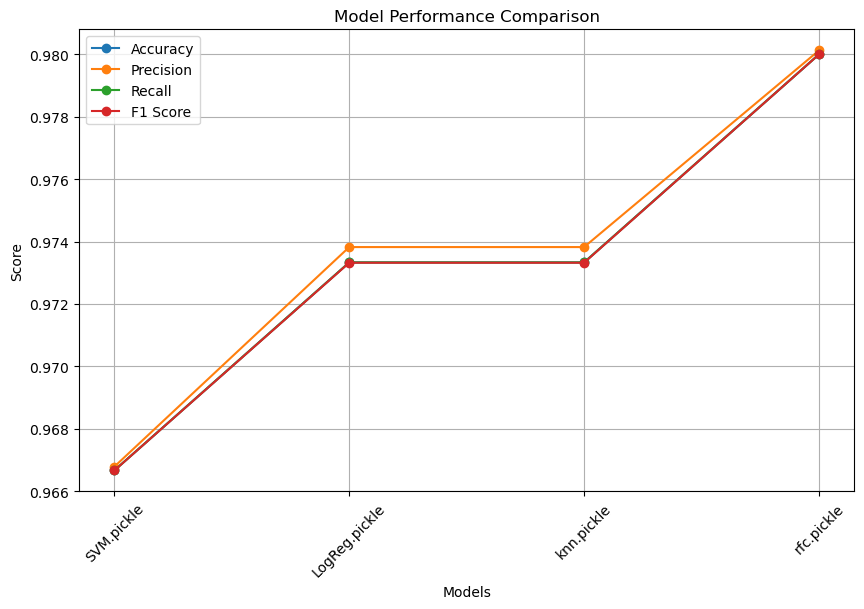

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
for metric in metrics:
    values = [results[m][metric] for m in model_files]
    ax.plot(model_files, values, marker='o', label=metric)

ax.set_title("Model Performance Comparison")
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()